In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Process relevant game data
games = pd.read_csv("game_data.csv")
games["Records_Delta"] = games["Wins_Entering_Gm"]-games["Losses_Entering_Gm"]
games["TotalGamesPlayed"] = games["Wins_Entering_Gm"]+games["Losses_Entering_Gm"]
games["WinPercentage"] = games["Wins_Entering_Gm"]/games["TotalGamesPlayed"].apply(lambda s: s if s > 0 else 1)
del games["Game_Date"]
del games["Team"]
del games["Location"]
del games["Wins_Entering_Gm"]
del games["Losses_Entering_Gm"]
del games["Team_Minutes"]
del games["Full_Timeouts"]
del games["Short_Timeouts"]

In [3]:
games[games["Game_ID"]==21600010]

,Season,Game_ID,Final_Score,Lead_Changes,Ties,Largest_Lead,Qtr_4_Score,L2M_Score,Records_Delta,TotalGamesPlayed,WinPercentage
18,2016-17,21600010,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
19,2016-17,21600010,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0


In [4]:
gamesGB = games.groupby("Game_ID")
gamesFrame = gamesGB["Game_ID"].mean().to_frame()
gamesFrame["Winner_Score"] = gamesGB["Final_Score"].max()
gamesFrame["Score_Diff"] = gamesFrame["Winner_Score"]-gamesGB["Final_Score"].min()
gamesFrame["Largest_Lead"] = gamesGB["Largest_Lead"].max()
gamesFrame["Lead_Diff"] = gamesFrame["Largest_Lead"]-gamesGB["Largest_Lead"].min()
gamesFrame["Q4_Score"] = gamesGB["Qtr_4_Score"].max()
gamesFrame["Q4_Diff"] = gamesFrame["Q4_Score"]-gamesGB["Qtr_4_Score"].min()
gamesFrame["L2M_Score"] = gamesGB["L2M_Score"].max()
gamesFrame["L2M_Diff"] = gamesFrame["L2M_Score"]-gamesGB["L2M_Score"].min()
gamesFrame["Better_RD"] = gamesGB["Records_Delta"].max()
gamesFrame["RD_Diff"] = gamesFrame["Better_RD"]-gamesGB["Records_Delta"].min()
gamesFrame["WPHome"] = gamesGB["WinPercentage"].first()
gamesFrame["WPAway"] = gamesGB["WinPercentage"].last()
gamesFrame["GamesPlayedHome"] = gamesGB["TotalGamesPlayed"].first()
gamesFrame["GamesPlayedAway"] = gamesGB["TotalGamesPlayed"].last()
gamesFrame["Sum_Lead_Changes"] = gamesGB["Lead_Changes"].sum()
gamesFrame["Total_Ties"] = gamesGB["Ties"].sum()
gamesFrame = gamesFrame.reset_index(drop=True)

In [5]:
gamesFrame.head(10)

,Game_ID,Winner_Score,Score_Diff,Largest_Lead,Lead_Diff,Q4_Score,Q4_Diff,L2M_Score,L2M_Diff,Better_RD,RD_Diff,WPHome,WPAway,GamesPlayedHome,GamesPlayedAway,Sum_Lead_Changes,Total_Ties
0,21600001,117.0,29.0,32.0,28.0,82.0,18.0,113.0,29.0,0,0,0.0,0.0,0,0,1.0,4.0
1,21600002,113.0,9.0,13.0,5.0,83.0,6.0,104.0,2.0,0,0,0.0,0.0,0,0,11.0,7.0
2,21600003,129.0,29.0,29.0,25.0,97.0,20.0,122.0,22.0,0,0,0.0,0.0,0,0,2.0,3.0
3,21600004,108.0,12.0,19.0,12.0,80.0,11.0,104.0,12.0,0,0,0.0,0.0,0,0,14.0,13.0
4,21600005,130.0,9.0,14.0,13.0,94.0,9.0,110.0,0.0,0,0,0.0,0.0,0,0,4.0,8.0
5,21600006,122.0,5.0,23.0,19.0,97.0,16.0,118.0,8.0,0,0,0.0,0.0,0,0,2.0,1.0
6,21600007,109.0,18.0,20.0,13.0,86.0,15.0,106.0,17.0,0,0,0.0,0.0,0,0,1.0,2.0
7,21600008,107.0,11.0,24.0,24.0,83.0,17.0,101.0,12.0,0,0,0.0,0.0,0,0,0.0,2.0
8,21600009,102.0,4.0,17.0,11.0,76.0,1.0,90.0,1.0,0,0,0.0,0.0,0,0,11.0,5.0
9,21600010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0,0,0.0,0.0


In [6]:
players = pd.read_csv("player_data.csv")

In [7]:
del players["Game_Date"]
del players["Person_ID"]
del players["Name"]
del players["ASG_Team"]
del players["Minutes"]
del players["Personal_Fouls"]
del players["Free_Throws_Attempted"]
del players["Free_Throws"]
del players["Three_Pointers_Attempted"]
del players["Field_Goals_Attempted"]
del players["Turnovers"]
del players["Assists"]
del players["Steals"]
del players["Defensive_Rebounds"]
del players["Offensive_Rebounds"]
players = players[players["Active_Status"]=="Active"]
del players["Active_Status"]
players["Team"] = players["Season"]+players["Team"]

In [8]:
players[players["Game_ID"]==21600010]

,Season,Game_ID,Team,Points,Blocks,Field_Goals,Three_Pointers
270,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
272,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
273,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
274,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
275,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
276,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
277,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
278,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
279,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN
280,2016-17,21600010,2016-17NOP,NaN,NaN,NaN,NaN


In [9]:
teamGB = players.groupby(["Game_ID", "Team"])
teamStats = teamGB.sum().reset_index()
avgTeamStats = teamStats.groupby("Team").mean().reset_index()

In [10]:
gameLeaders = teamGB.max().reset_index()
gameLeadersGB = gameLeaders.groupby("Game_ID")
gameLeaders = gameLeadersGB["Game_ID"].first().to_frame()
gameLeaders["Home_Points"] = gameLeadersGB["Points"].first()
gameLeaders["Away_Points"] = gameLeadersGB["Points"].last()
gameLeaders["Home_FG"] = gameLeadersGB["Blocks"].first()
gameLeaders["Away_FG"] = gameLeadersGB["Blocks"].last()
gameLeaders["Home_Blocks"] = gameLeadersGB["Field_Goals"].first()
gameLeaders["Away_Blocks"] = gameLeadersGB["Field_Goals"].last()
gameLeaders["Home_TP"] = gameLeadersGB["Three_Pointers"].first()
gameLeaders["Away_TP"] = gameLeadersGB["Three_Pointers"].last()
gameLeaders = gameLeaders.reset_index(drop=True)

In [11]:
train = pd.read_csv("training_set.csv")

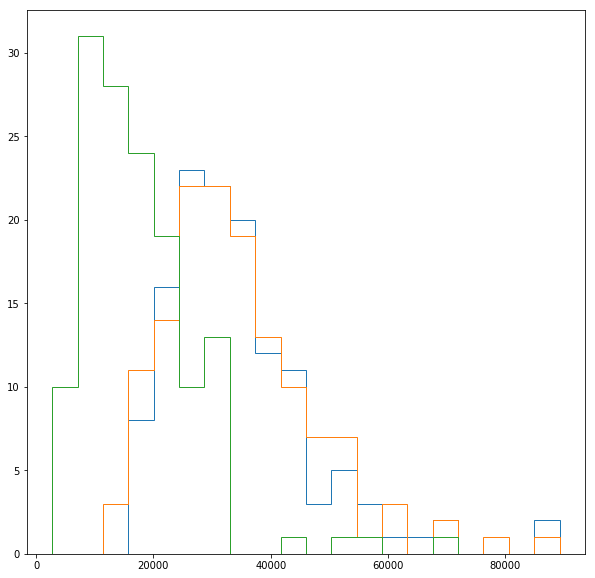

In [12]:
# Check Distributions
CLE = train[(train["Home_Team"]=="CLE")|(train["Away_Team"]=="CLE")].groupby(["Game_ID"])["Rounded Viewers"].sum()
GSW = train[(train["Home_Team"]=="GSW")|(train["Away_Team"]=="GSW")].groupby(["Game_ID"])["Rounded Viewers"].sum()
NYK = train[(train["Home_Team"]=="NYK")|(train["Away_Team"]=="NYK")].groupby(["Game_ID"])["Rounded Viewers"].sum()

bins=np.histogram(np.hstack((CLE,GSW,NYK)), bins="auto")[1] #get the bin edges

plt.figure(figsize=(10,10))
plt.hist(CLE, histtype="step", bins=bins)
plt.hist(GSW, histtype="step", bins=bins)
plt.hist(NYK, histtype="step", bins=bins)
plt.show()

In [13]:
# process Train in some magic way
gb = train.groupby(["Season","Game_ID","Game_Date", "Away_Team", "Home_Team"]).sum().reset_index()
gb["Game_Date"] = pd.to_datetime(gb["Game_Date"])
gb["Day_Of_Week"] = gb["Game_Date"].apply(lambda s: s.dayofweek)
gb["Day_Of_Month"] = gb["Game_Date"].apply(lambda s: s.day)
gb["Month"] = gb["Game_Date"].apply(lambda s: (s.month+2)%12)

In [14]:
# Baseline prediction to average
gb = gb.reset_index(drop=True)
gb["Away_Team"]=gb["Season"]+gb["Away_Team"]
baseline_away = gb.groupby(["Away_Team"])["Rounded Viewers"].mean().to_frame().reset_index()
baseline_away["Away_avg"] = baseline_away["Rounded Viewers"]
gb["Home_Team"]=gb["Season"]+gb["Home_Team"]
baseline_home = gb.groupby(["Home_Team"])["Rounded Viewers"].mean().to_frame().reset_index()
baseline_home["Home_avg"] = baseline_home["Rounded Viewers"]
del baseline_away["Rounded Viewers"]
del baseline_home["Rounded Viewers"]

In [16]:
baseline_away.head(10)

,Away_Team,Away_avg
0,2016-17ATL,14430.314286
1,2016-17BKN,12134.057143
2,2016-17BOS,18928.200000
3,2016-17CHA,13005.290323
4,2016-17CHI,18828.363636
5,2016-17CLE,31594.714286
6,2016-17DAL,13240.093750
7,2016-17DEN,11822.535714
8,2016-17DET,11405.411765
9,2016-17GSW,38153.783784


In [15]:
# Frame joins
gamesFrameTrain = pd.merge(gb, gamesFrame, on="Game_ID")
gamesFrameTrain = pd.merge(gamesFrameTrain, gameLeaders, on="Game_ID", how="left")
gamesFrameTrain = pd.merge(gamesFrameTrain, baseline_away, on="Away_Team", how="left")
gamesFrameTrain = pd.merge(gamesFrameTrain, baseline_home, on="Home_Team", how="left")

In [17]:
# Remove bias from 0 entries
gamesFrameTrain = gamesFrameTrain[(gamesFrameTrain["GamesPlayedAway"]>0)|(gamesFrame["GamesPlayedHome"]>0)]

/Users/Jeffrey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [18]:
# Feature selection using correlation
gamesFrameTrain.corr()["Rounded Viewers"]

Game_ID             0.026793
Rounded Viewers     1.000000
Day_Of_Week         0.060888
Day_Of_Month        0.011904
Month              -0.233808
Winner_Score        0.087077
Score_Diff         -0.141668
Largest_Lead       -0.106671
Lead_Diff          -0.112688
Q4_Score            0.078228
Q4_Diff            -0.096560
L2M_Score           0.048211
L2M_Diff           -0.138907
Better_RD           0.316901
RD_Diff            -0.061590
WPHome              0.350535
WPAway              0.173664
GamesPlayedHome    -0.241086
GamesPlayedAway    -0.242464
Sum_Lead_Changes    0.108768
Total_Ties          0.107973
Home_Points         0.236632
Away_Points         0.195715
Home_FG             0.021986
Away_FG            -0.001873
Home_Blocks         0.192790
Away_Blocks         0.169510
Home_TP             0.140232
Away_TP             0.082180
Away_avg            0.595972
Home_avg            0.540503
Name: Rounded Viewers, dtype: float64

In [19]:
def MAPE(prediction, truth):
    return np.mean(abs(prediction-truth)/truth)

In [20]:
features = ["Better_RD", "Away_avg", "Home_avg", "WPHome", "WPAway", "GamesPlayedHome", "GamesPlayedAway"]
target = "Rounded Viewers"
X = gamesFrameTrain[features]
y = gamesFrameTrain[target]
lm = LinearRegression(fit_intercept=True, normalize=True)
lm = lm.fit(X,y)
print "Intercept: " + str(lm.intercept_)
for i in xrange(len(features)):
    print features[i]+": "+str(lm.coef_[i])
print
print "R^2:" +str(lm.score(X,y))
print "MAPE: "+str(MAPE(lm.predict(X), y))
print "MAPE Baseline: "+str(MAPE(np.mean(y)*np.ones(len(y)), y))

Intercept: -15088.2780223
Better_RD: -29.2584251621
Away_avg: 1.02497861199
Home_avg: 1.03373473847
WPHome: 794.905765029
WPAway: 2030.84939077
GamesPlayedHome: 89.19945102
GamesPlayedAway: -191.71201011

R^2:0.724641685324
MAPE: 0.306959540935
MAPE Baseline: 0.700241770453


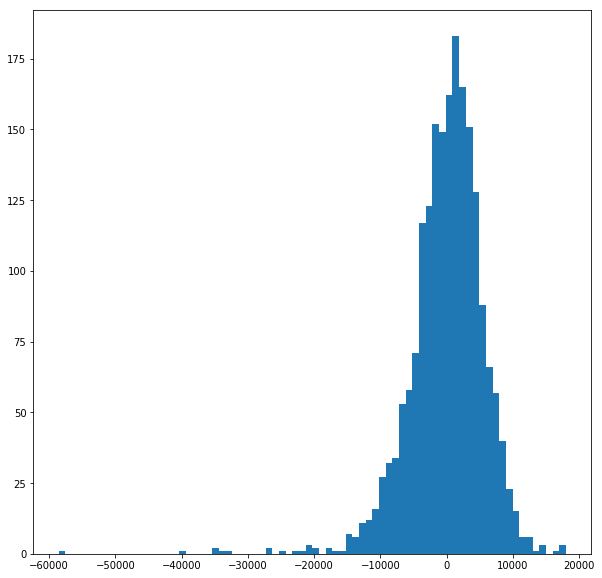

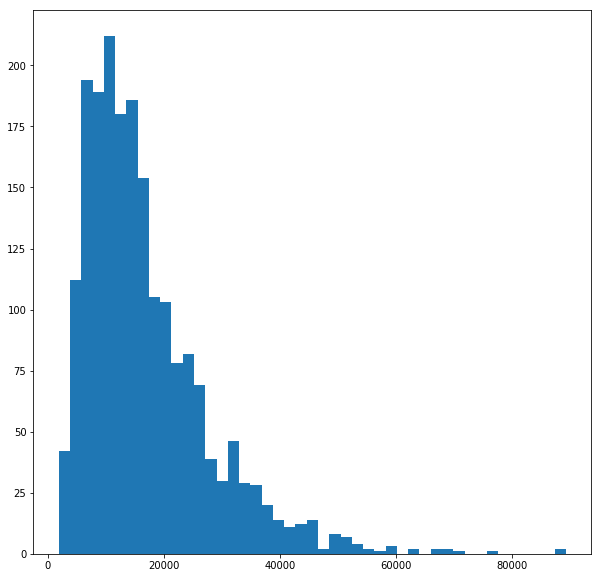

In [21]:
# Residuals can suck my dick.... May need to deal with outliers
plt.figure(figsize=(10,10))
plt.hist(lm.predict(X)-y, bins="auto")
plt.show()

# Skew'ed distribution shows why residuals are fucked
plt.figure(figsize=(10,10))
plt.hist(y, bins="auto")
plt.show()

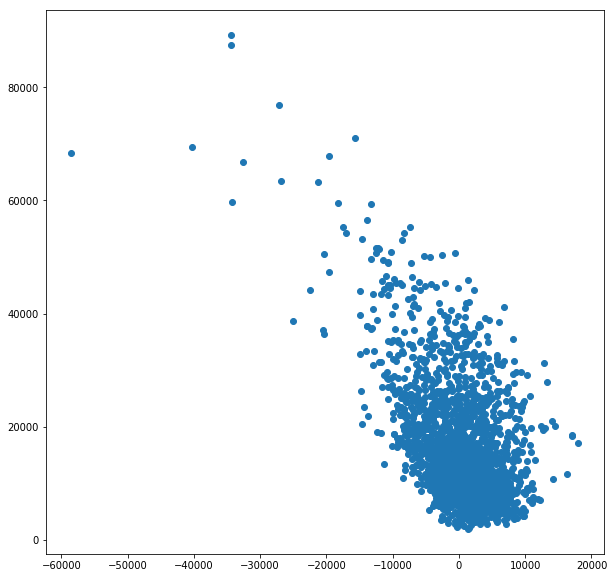

In [22]:
gamesFrameTrain["Training Residual"] = lm.predict(X)-y
plt.figure(figsize=(10,10))
plt.scatter(gamesFrameTrain["Training Residual"], gamesFrameTrain["Rounded Viewers"])
plt.show()

In [23]:
gamesFrameTrain[abs(gamesFrameTrain["Training Residual"])>10000]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Rounded Viewers,Day_Of_Week,Day_Of_Month,Month,Winner_Score,...,Away_Points,Home_FG,Away_FG,Home_Blocks,Away_Blocks,Home_TP,Away_TP,Away_avg,Home_avg,Training Residual
15,2016-17,21600017,2016-10-27,2016-17LAC,2016-17POR,29674,3,27,0,114.0,...,29.0,1.0,3.0,9.0,11.0,3.0,2.0,16810.727273,14392.914286,-10843.307675
16,2016-17,21600018,2016-10-28,2016-17CLE,2016-17TOR,48951,4,28,0,94.0,...,32.0,2.0,2.0,10.0,12.0,5.0,2.0,31594.714286,17658.842105,-10706.828931
28,2016-17,21600033,2016-10-29,2016-17POR,2016-17DEN,27076,5,29,0,115.0,...,37.0,2.0,3.0,10.0,15.0,2.0,2.0,16660.121212,11601.117647,-11608.684324
31,2016-17,21600036,2016-10-30,2016-17GSW,2016-17PHX,50617,6,30,0,106.0,...,26.0,3.0,3.0,10.0,10.0,5.0,2.0,38153.783784,13434.058824,-12518.784629
38,2016-17,21600043,2016-10-31,2016-17CHI,2016-17BKN,33346,0,31,0,118.0,...,22.0,1.0,3.0,6.0,7.0,2.0,4.0,18828.363636,13667.100000,-13990.850369
66,2016-17,21600080,2016-11-05,2016-17CLE,2016-17PHI,54229,5,5,1,102.0,...,22.0,2.0,4.0,9.0,8.0,4.0,4.0,31594.714286,18857.518519,-17111.936800
71,2016-17,21600086,2016-11-05,2016-17LAC,2016-17SAS,35096,5,5,1,116.0,...,19.0,3.0,1.0,13.0,7.0,3.0,3.0,16810.727273,20075.058824,-10694.365835
72,2016-17,21600087,2016-11-06,2016-17UTA,2016-17NYK,32867,6,6,1,114.0,...,28.0,2.0,3.0,12.0,8.0,3.0,2.0,14603.212121,21018.297297,-10630.841676
83,2016-17,21600100,2016-11-08,2016-17ATL,2016-17CLE,44960,1,8,1,110.0,...,29.0,3.0,1.0,10.0,11.0,4.0,3.0,14430.314286,31930.545455,-10479.639799
99,2016-17,21600118,2016-11-10,2016-17CHI,2016-17MIA,33327,3,10,1,98.0,...,20.0,1.0,3.0,8.0,8.0,2.0,4.0,18828.363636,15185.909091,-12780.680007


In [24]:
test = pd.read_csv("test_set.csv")

In [25]:
test["Away_Team"] = test["Season"]+test["Away_Team"]
test["Home_Team"] = test["Season"]+test["Home_Team"]

In [26]:
test

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600010,10/26/2016,2016-17DEN,2016-17NOP,NaN
1,2016-17,21600023,10/28/2016,2016-17HOU,2016-17DAL,NaN
2,2016-17,21600027,10/29/2016,2016-17BOS,2016-17CHA,NaN
3,2016-17,21600026,10/29/2016,2016-17ATL,2016-17PHI,NaN
4,2016-17,21600048,11/1/2016,2016-17LAL,2016-17IND,NaN
5,2016-17,21600053,11/1/2016,2016-17UTA,2016-17SAS,NaN
6,2016-17,21600050,11/1/2016,2016-17NYK,2016-17DET,NaN
7,2016-17,21600049,11/1/2016,2016-17SAC,2016-17MIA,NaN
8,2016-17,21600061,11/2/2016,2016-17CHI,2016-17BOS,NaN
9,2016-17,21600063,11/2/2016,2016-17POR,2016-17PHX,NaN


In [27]:
# Create Frame for prediction
gamesFrameTest = pd.merge(test, gamesFrame, on="Game_ID")
gamesFrameTest = pd.merge(gamesFrameTest, baseline_away, on="Away_Team", how="left")
gamesFrameTest = pd.merge(gamesFrameTest, baseline_home, on="Home_Team", how="left")

In [28]:
test["Total_Viewers"] = lm.predict(gamesFrameTest[features])

In [29]:
test

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600010,10/26/2016,2016-17DEN,2016-17NOP,12489.729069
1,2016-17,21600023,10/28/2016,2016-17HOU,2016-17DAL,18772.520932
2,2016-17,21600027,10/29/2016,2016-17BOS,2016-17CHA,20996.820388
3,2016-17,21600026,10/29/2016,2016-17ATL,2016-17PHI,19859.292239
4,2016-17,21600048,11/1/2016,2016-17LAL,2016-17IND,17918.360157
5,2016-17,21600053,11/1/2016,2016-17UTA,2016-17SAS,21768.471386
6,2016-17,21600050,11/1/2016,2016-17NYK,2016-17DET,17837.358819
7,2016-17,21600049,11/1/2016,2016-17SAC,2016-17MIA,14963.264684
8,2016-17,21600061,11/2/2016,2016-17CHI,2016-17BOS,25573.766940
9,2016-17,21600063,11/2/2016,2016-17POR,2016-17PHX,16480.617637
